# Dynamics for the UR5 Robot calculated versus Peter Cook

In [14]:
import numpy as np
from roboticstoolbox import DHRobot, RevoluteDH

from src.ur5_dynamics import UR5DynamicModel
from src.compare_models import compare_models

For the UR5 robot:

- Do research on its sound model;
- Check the specifications of the joints and choose compatible random efforts (forces or torques);
- Implement dynamic equations through a script (python, matlab, lua...);
- Apply efforts directly to the joints and monitor the positions of the links;
- Compare with the results obtained by applying the same efforts to the model simulated by a simulator of your choice.

In [15]:
# Initial config
qd0 = np.zeros(6)
q0 = np.zeros(6)

# Torque input
tau = np.array([0.01, -0.1, 0.4, -0.2, 0.3, -1.1])
t_span = np.linspace(0, 0.15, 100)

In [16]:
print("Running own model")
ur5 = UR5DynamicModel()
sol_custom = ur5.simulate(q0, qd0, tau, t_span)

Running own model
...
Integrating dynamics using solve_ivp...
Simulating t = 0.15s
 Simulation completed!


In [17]:
print("Running Robotics Toolbox model")
ur5_rtb = DHRobot([
    RevoluteDH(d=0.089159, alpha=np.pi/2),
    RevoluteDH(a=-0.425),
    RevoluteDH(a=-0.39225),
    RevoluteDH(d=0.10915, alpha=np.pi/2),
    RevoluteDH(d=0.09465, alpha=-np.pi/2),
    RevoluteDH(d=0.0823)
], name="UR5")

Running Robotics Toolbox model


Saving plots to: /home/ivon/code/ur5_robot_dynamics_comparison/results
Configuring and simulating Robotics Toolbox model...


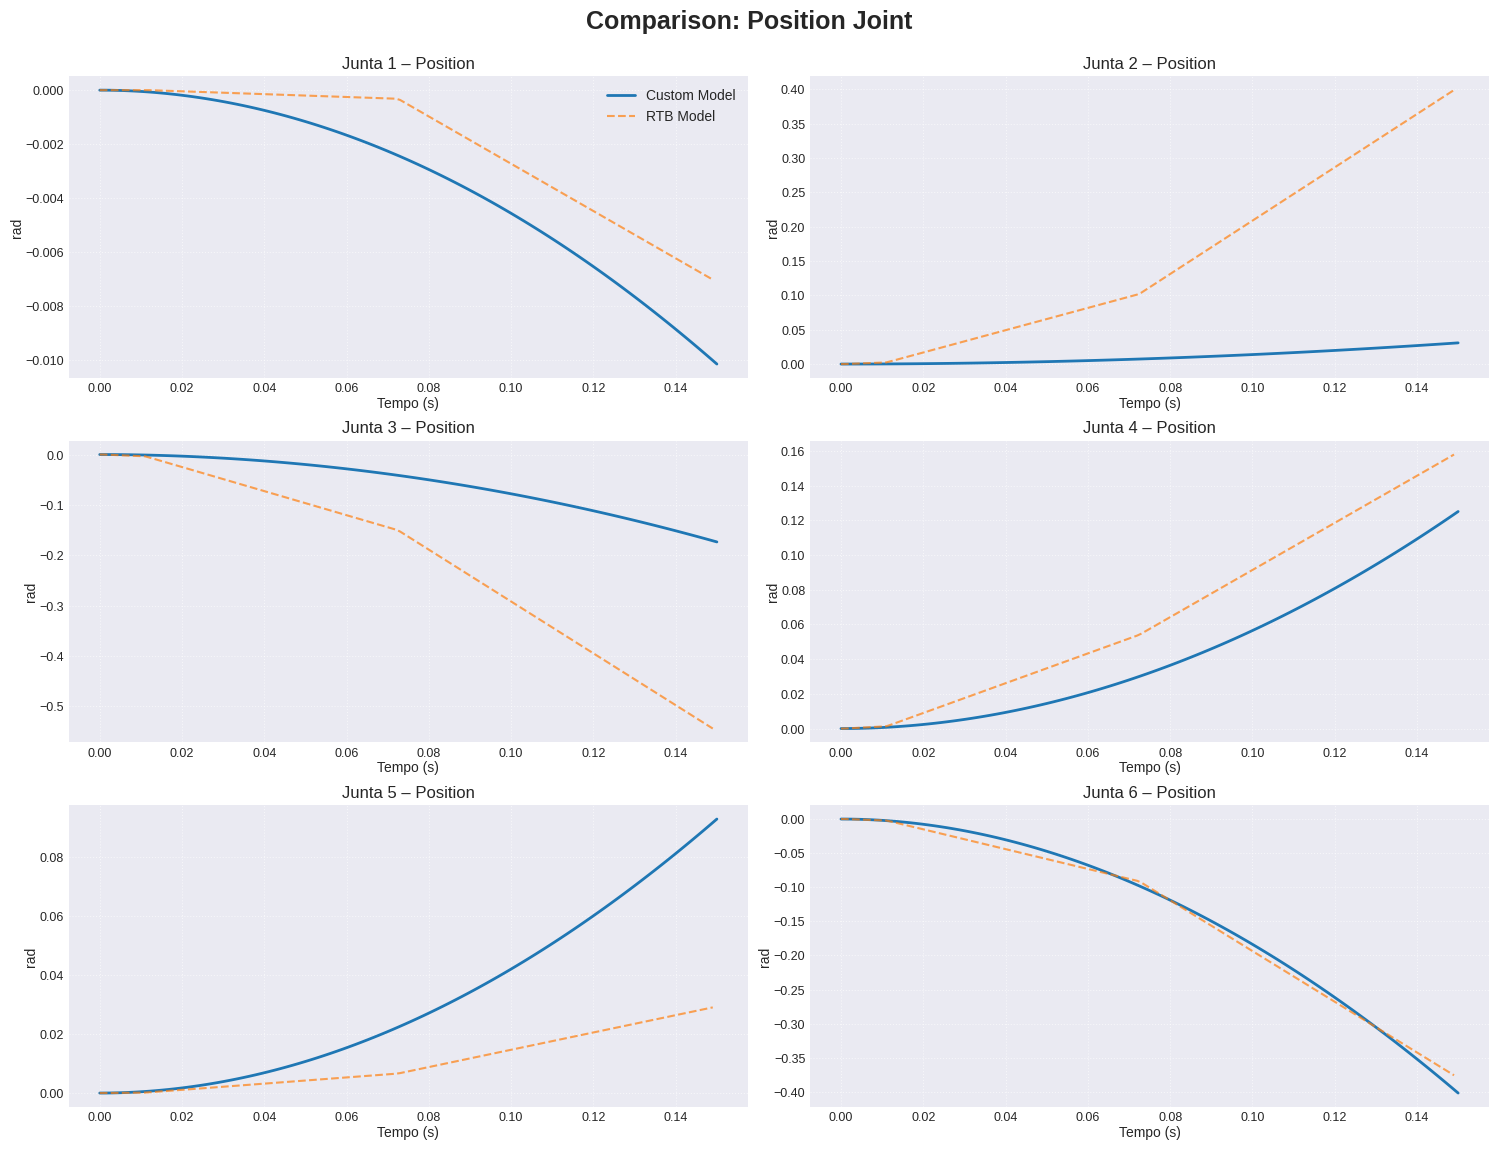

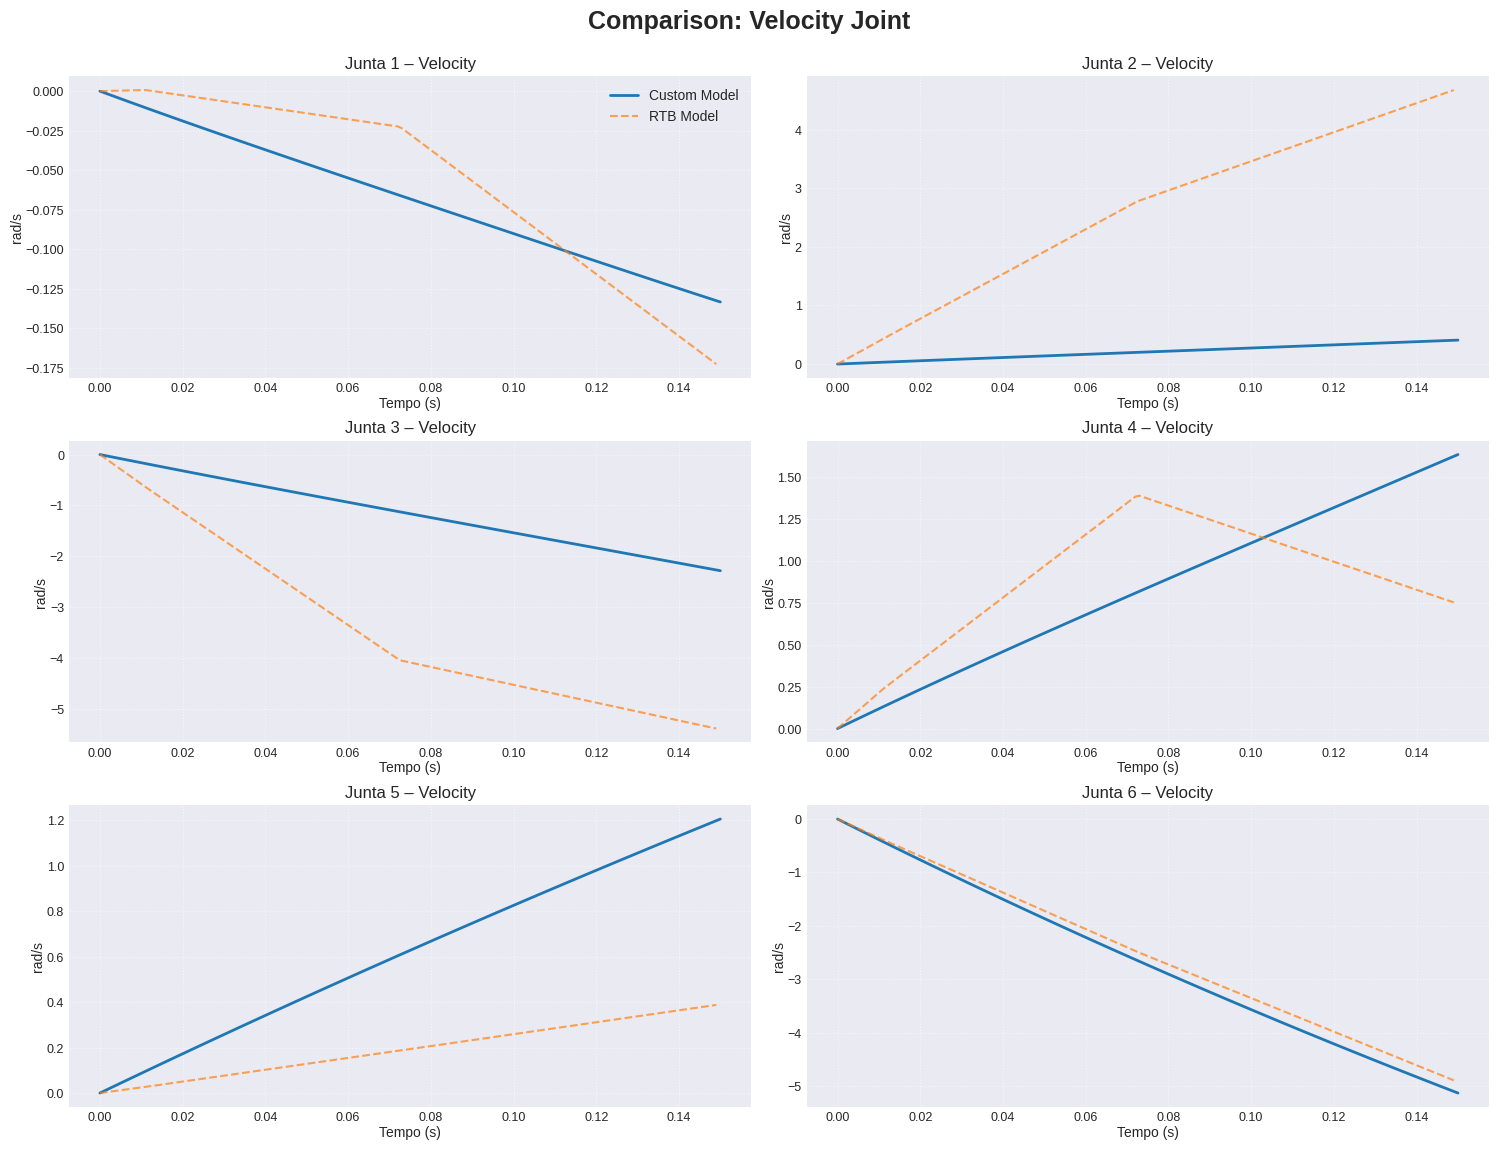


Plotting complete. Figures saved to the 'results' folder.

Final Joint Position Errors (Custom vs RTB):
Joint 1: -3.133370e-03 rad
Joint 2: -3.683176e-01 rad
Joint 3: 3.703657e-01 rad
Joint 4: -3.284171e-02 rad
Joint 5: 6.381815e-02 rad
Joint 6: -2.604066e-02 rad

RMS Error of Final Joint Positions: 2.155102e-01 rad


In [18]:
compare_models(tau, ur5, sol_custom, ur5_rtb, t_span)